In [5]:
from nlp_cyber_ner.config import  EVAL_DATA_DIR, PROCESSED_DATA_DIR

from nlp_cyber_ner.dataset import read_iob2_file


eval_aptner = read_iob2_file(PROCESSED_DATA_DIR / "aptner" / "valid.unified")
train_aptner_eval_aptner = read_iob2_file(EVAL_DATA_DIR / "train-aptner-eval-aptner.txt")
train_big_model_eval_aptner = read_iob2_file(EVAL_DATA_DIR / "train-big_model-eval-aptner.txt")

eval_cyner = read_iob2_file(PROCESSED_DATA_DIR / "cyner" / "valid.unified")
train_cyner_eval_cyner = read_iob2_file(EVAL_DATA_DIR / "train-cyner-eval-cyner.txt")
train_big_model_eval_cyner = read_iob2_file(EVAL_DATA_DIR / "train-big_model-eval-cyner.txt")

labels = ['B-Malware',
 'B-Organization',
 'B-System',
 'B-Vulnerability',
 'I-Malware',
 'I-Organization',
 'I-System',
 'I-Vulnerability',
 'O']

def obtain_ner_labels(data):
    """
    Flatten the list of labels from the data.
    """
    # Flatten the list of labels
    flat_labels = [item for sublist in list(zip(*data))[1] for item in sublist]
    return flat_labels

# Obtain the labels for each dataset
eval_aptner_labels = obtain_ner_labels(eval_aptner)
train_aptner_eval_aptner_labels = obtain_ner_labels(train_aptner_eval_aptner)
train_big_model_eval_aptner_labels = obtain_ner_labels(train_big_model_eval_aptner)

eval_cyner_labels = obtain_ner_labels(eval_cyner)
train_cyner_eval_cyner_labels = obtain_ner_labels(train_cyner_eval_cyner)
train_big_model_eval_cyner_labels = obtain_ner_labels(train_big_model_eval_cyner)

In [6]:
# Compute and display four confusion matrices: train_cyner vs eval_cyner, train_aptner vs eval_aptner, train_big_model vs eval_cyner, and train_big_model vs eval_aptner

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay


def get_confusion_matrix(y_true, y_pred, labels):
    assert len(y_true) == len(y_pred), "Length of y_true and y_pred must be the same"
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    return cm

def plot_confusion_matrix(cm, title, labels):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    return disp

def count_labels_distribution(labels):
    """
    Count the distribution of labels in the list.
    """
    label_counts = {label: labels.count(label) for label in set(labels)}
    return label_counts

In [7]:
train_big_model_eval_cyner_cm = get_confusion_matrix(eval_cyner_labels, train_big_model_eval_cyner_labels, labels)
train_cyner_eval_cyner_cm = get_confusion_matrix(eval_cyner_labels, train_cyner_eval_cyner_labels, labels)
train_big_model_eval_aptner_cm = get_confusion_matrix(eval_aptner_labels, train_big_model_eval_aptner_labels, labels)
train_aptner_eval_aptner_cm = get_confusion_matrix(eval_aptner_labels, train_aptner_eval_aptner_labels, labels)
diff_big_model_eval_cyner_cm = train_big_model_eval_cyner_cm - train_cyner_eval_cyner_cm
diff_big_model_eval_aptner_cm = train_big_model_eval_aptner_cm - train_aptner_eval_aptner_cm

C:\Users\macie\AppData\Local\Temp\ipykernel_26804\3709057388.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


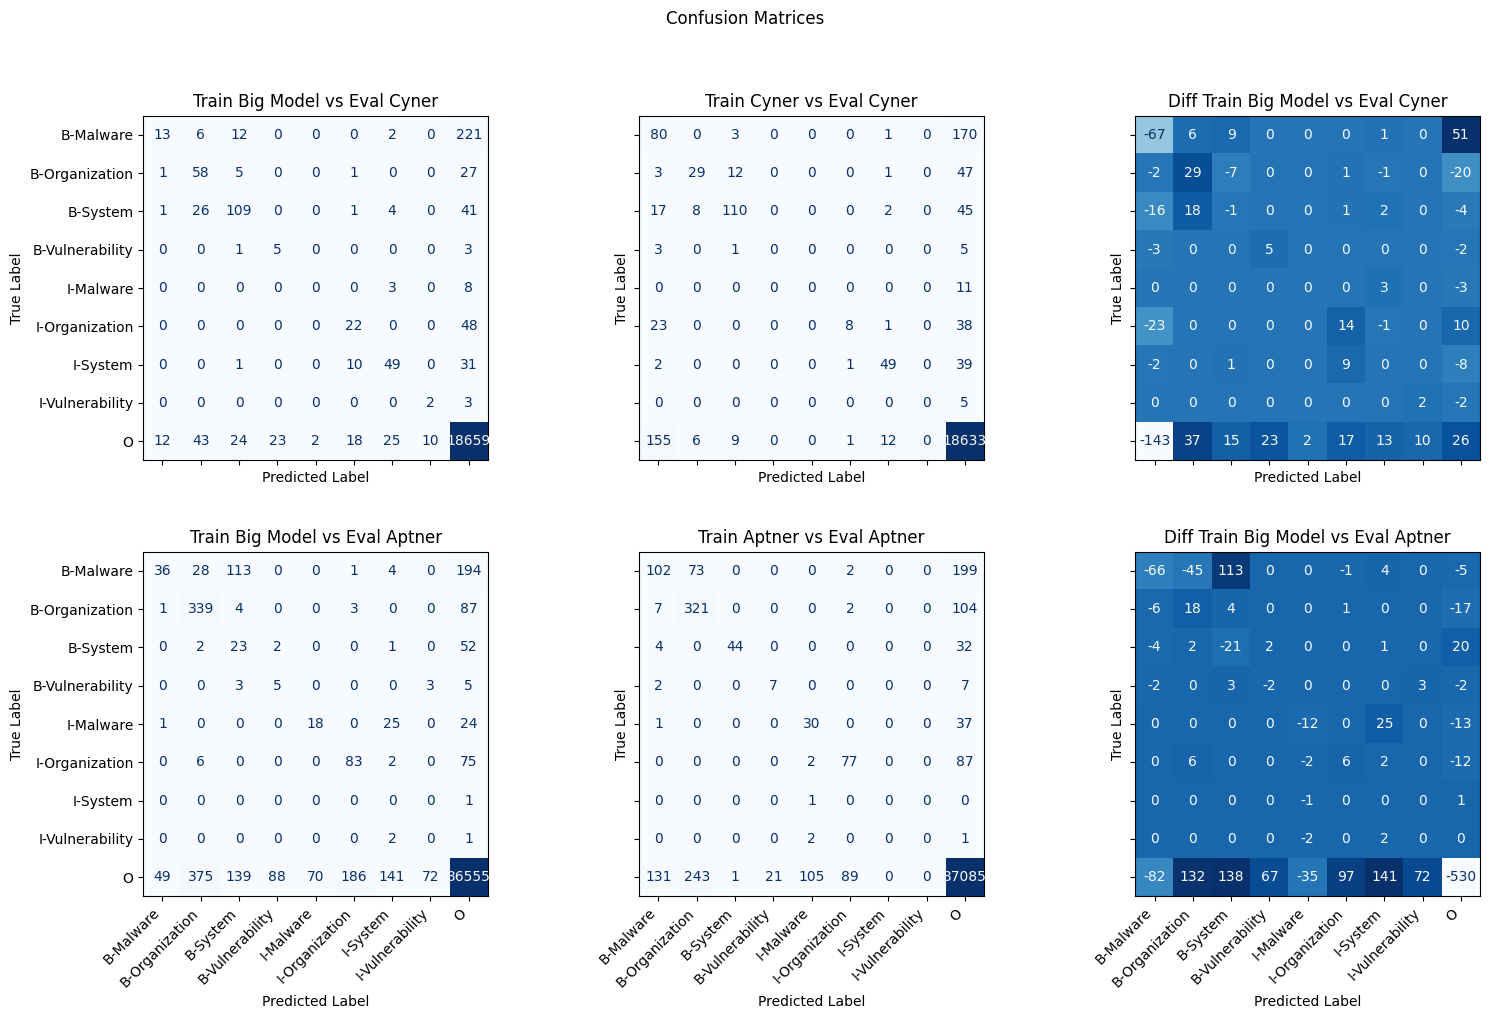

In [8]:
pcm1 = plot_confusion_matrix(train_big_model_eval_cyner_cm, "Train Big Model vs Eval Cyner", labels)
pcm2 = plot_confusion_matrix(train_cyner_eval_cyner_cm, "Train Cyner vs Eval Cyner", labels)
pcm3 = plot_confusion_matrix(diff_big_model_eval_cyner_cm, "Diff Train Big Model vs Eval Cyner", labels)
pcm4 = plot_confusion_matrix(train_big_model_eval_aptner_cm, "Train Big Model vs Eval Aptner", labels)
pcm5 = plot_confusion_matrix(train_aptner_eval_aptner_cm, "Train Aptner vs Eval Aptner", labels)
pcm6 = plot_confusion_matrix(diff_big_model_eval_aptner_cm, "Diff Train Big Model vs Eval Aptner", labels)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Confusion Matrices")
pcm1.plot(ax=axs[0, 0], cmap=plt.cm.Blues, colorbar=False)
pcm2.plot(ax=axs[0, 1], cmap=plt.cm.Blues, colorbar=False)
pcm3.plot(ax=axs[0, 2], cmap=plt.cm.Blues, colorbar=False)
pcm4.plot(ax=axs[1, 0], cmap=plt.cm.Blues, colorbar=False)
pcm5.plot(ax=axs[1, 1], cmap=plt.cm.Blues, colorbar=False)
pcm6.plot(ax=axs[1, 2], cmap=plt.cm.Blues, colorbar=False)
axs[0, 0].set_title("Train Big Model vs Eval Cyner")
axs[0, 1].set_title("Train Cyner vs Eval Cyner")
axs[0, 2].set_title("Diff Train Big Model vs Eval Cyner")
axs[1, 0].set_title("Train Big Model vs Eval Aptner")
axs[1, 1].set_title("Train Aptner vs Eval Aptner")
axs[1, 2].set_title("Diff Train Big Model vs Eval Aptner")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
# rotate x-ticks by 45 degrees
for ax in axs.flat:
    ax.label_outer()
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.set_xticklabels(labels, rotation=45, ha='right')
fig.show()


Text(0.5, 1.0, 'Diff Train Combined vs Eval Aptner')

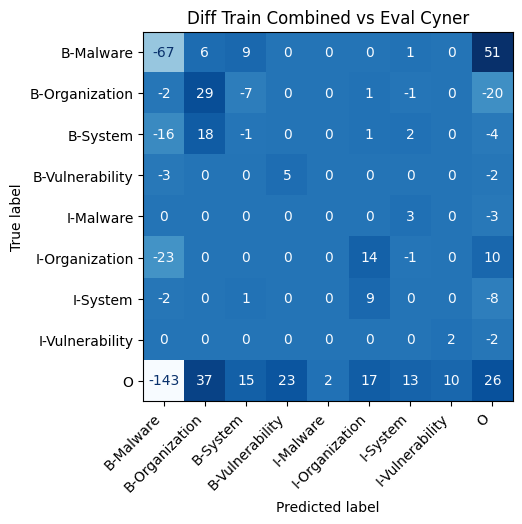

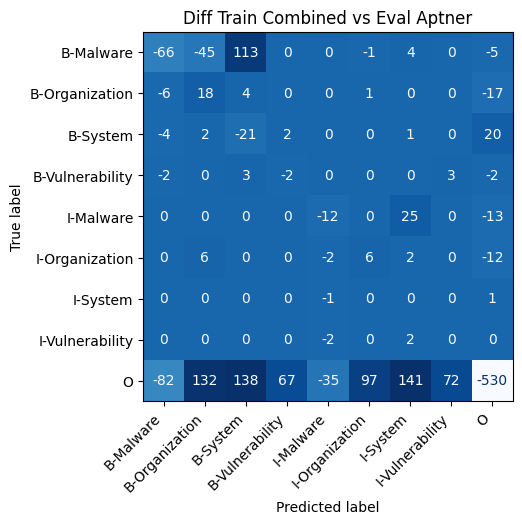

In [13]:
pcm3.plot(cmap=plt.cm.Blues, colorbar=False)
plt.xticks(rotation=45, ha='right')
plt.title("Diff Train Combined vs Eval Cyner")

pcm6.plot(cmap=plt.cm.Blues, colorbar=False)
plt.xticks(rotation=45, ha='right')
plt.title("Diff Train Combined vs Eval Aptner")

In [ ]:
len(eval_aptner_labels)

38819

In [ ]:
# distribution of true labels
dist_eval_cyner = count_labels_distribution(eval_cyner_labels)
dist_eval_aptner = count_labels_distribution(eval_aptner_labels)
# plot the distribution of labels in a bar chart

print(dist_eval_cyner)
print(dist_eval_aptner)
# compute for each the percentage of O labels
def compute_percentage_of_O(labels):
    """
    Compute the percentage of O labels in the list.
    """
    total_labels = len(labels)
    o_labels = labels.count('O')
    percentage = (o_labels / total_labels) * 100
    return percentage

print("Percentage of O labels in eval_cyner: ", compute_percentage_of_O(eval_cyner_labels))
print("Percentage of O labels in eval_aptner: ", compute_percentage_of_O(eval_aptner_labels))

{'I-Malware': 11, 'B-System': 182, 'I-Organization': 70, 'B-Vulnerability': 9, 'O': 18816, 'I-Vulnerability': 5, 'I-System': 91, 'B-Organization': 92, 'B-Malware': 254}
{'I-Malware': 68, 'B-System': 80, 'I-Organization': 166, 'B-Vulnerability': 16, 'O': 37675, 'I-Vulnerability': 3, 'I-System': 1, 'B-Organization': 434, 'B-Malware': 376}
Percentage of O labels in eval_cyner:  96.34408602150538
Percentage of O labels in eval_aptner:  97.05298951544347


In [15]:

train_cyner_cyner = read_iob2_file(EVAL_DATA_DIR / "train-cyner-cyner.txt")
labels_train_cyner_cyner = obtain_ner_labels(train_cyner_cyner)

labels_train_cyner_cyner.count('O') / len(labels_train_cyner_cyner) * 100

96.02342786683107

In [16]:

train_cyner_cyner = read_iob2_file(EVAL_DATA_DIR / "train-big_model-cyner.txt")
labels_train_cyner_cyner = obtain_ner_labels(train_cyner_cyner)

labels_train_cyner_cyner.count('O') / len(labels_train_cyner_cyner) * 100

91.93950865518754